## Graph Visualization

* Load a graph database of your choosing from a text file or other source.
If you take a large network dataset from the web (such as from Stanford Large Network Dataset Collection),
please feel free at this point to load just a small subset of the nodes and edges.
Create basic analysis on the graph, including the graph’s diameter,
and at least one other metric of your choosing.
* You may either code the functions by hand (to build your intuition and insight),
or use functions in an existing package.
Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
* Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.

## Network X and Yfinance

In [24]:
import yfinance as yf
import pandas as pd
import networkx as nx

In [14]:
var1 = yf.Ticker('AAPL')

In [15]:
apple = var1.institutional_holders

In [16]:
apple['comp'] = var1.ticker

In [17]:
var2 = yf.Ticker('MSFT')

In [18]:
msft = var2.institutional_holders

In [19]:
msft['comp'] = var2.ticker

## Analysis on Apple
We can see that the center node AAPL has the most importance

In [27]:
G = nx.from_pandas_edgelist(apple, 'Holder', 'comp')

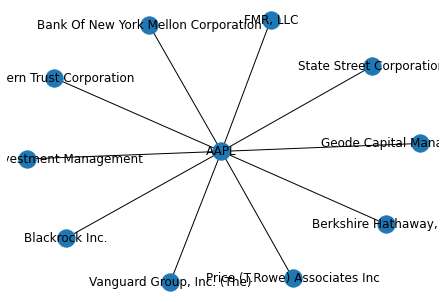

In [28]:
nx.draw(G, with_labels=True)

## Analysis on MSFT

In [30]:
G = nx.from_pandas_edgelist(msft, 'Holder', 'comp')


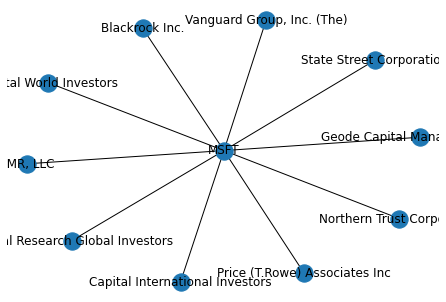

In [31]:
nx.draw(G, with_labels=True)

## APPLE + MSFT
Concatenate 2 data frames AAPL & MSFT

In [48]:
# together
tog_ = pd.concat([apple, msft])

In [49]:
# using networkx to draw
G2 = nx.from_pandas_edgelist(tog_, 'Holder', 'comp')

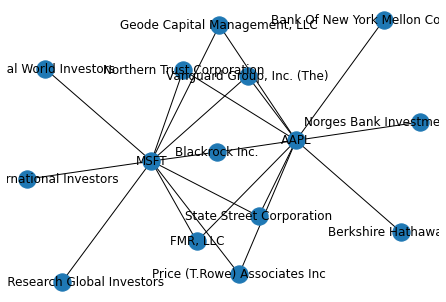

In [50]:
nx.draw(G2, with_labels=True)

### Degree Centrality
 Which nodes are important?
 * Degree Centrality
 * Betweenness Centrality

In [51]:
diam = nx.diameter(G2)
print(diam)

4


The degree of a node is the number of neighbors that it has

In [52]:
# degree centrality - List comprehension

degrees = [len(list(G2.neighbors(n))) for n in G2.nodes]
print(degrees)

[2, 10, 2, 1, 2, 2, 2, 2, 2, 1, 1, 10, 1, 1, 1]


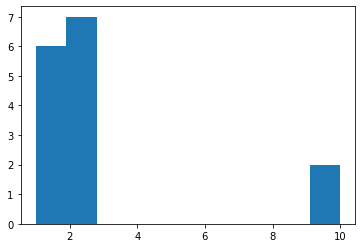

In [53]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(degrees)
plt.show()

### Degree Centrality Distribution
The degree centrality is the number of neighbors divided by all possible neighbors that it could have.

In [54]:
deg_cent = nx.degree_centrality(G2)

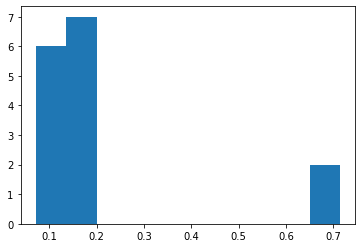

In [55]:

plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

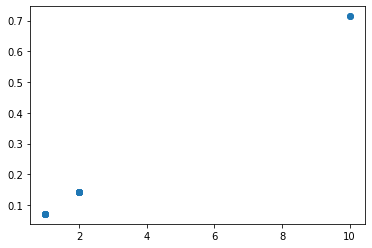

In [56]:
# scatter plot of the centrality dist and degree dist

plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()